In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import requests

In [37]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv" # URL du fichier distant

In [38]:
# chemin du fichier local
local_file_path = "local_data_varicelle.csv"

# Vérif si le fichier local existe
if not os.path.exists(local_file_path):
    # Si le fichier local n'existe pas,on télécharge les données
    response = requests.get(data_url)
    with open(local_file_path, 'wb') as local_file:
        local_file.write(response.content)

In [39]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202347          7   6869     4277    9461      10           6   
1     202346          7   5300     3017    7583       8           5   
2     202345          7   5007     2675    7339       8           4   
3     202344          7   3688     1664    5712       6           3   
4     202343          7   3891     1675    6107       6           3   
5     202342          7   3968     1212    6724       6           2   
6     202341          7   3356     1764    4948       5           3   
7     202340          7   2845     1410    4280       4           2   
8     202339          7   1739      629    2849       3           1   
9     202338          7   1663      274    3052       3           1   
10    202337          7   1122      223    2021       2           1   
11    202336          7    726       10    1442       1           0   
12    202335          7    961       96    1826       1           0   
13    202334          7   1168        9    2327       2           0   
14    202333          7   3308     1184    5432       5           2   
15    202332          7   7996     1120   14872      12           2   
16    202331          7   3318     1398    5238       5           2   
17    202330          7   5821     3269    8373       9           5   
18    202329          7  13558     8297   18819      20          12   
19    202328          7   6700     4043    9357      10           6   
20    202327          7   7253     4599    9907      11           7   
21    202326          7   9192     6223   12161      14          10   
22    202325          7  11498     8257   14739      17          12   
23    202324          7  11115     7968   14262      17          12   
24    202323          7  12563     6134   18992      19           9   
25    202322          7  12184     8125   16243      18          12   
26    202321          7  11349     7598   15100      17          11   
27    202320          7   9000     4615   13385      14           7   
28    202319          7   9344     6091   12597      14           9   
29    202318          7  10671     7291   14051      16          11   
...      ...        ...    ...      ...     ...     ...         ...   
1691  199126          7  17608    11304   23912      31          20   
1692  199125          7  16169    10700   21638      28          18   
1693  199124          7  16171    10071   22271      28          17   
1694  199123          7  11947     7671   16223      21          13   
1695  199122          7  15452     9953   20951      27          17   
1696  199121          7  14903     8975   20831      26          16   
1697  199120          7  19053    12742   25364      34          23   
1698  199119          7  16739    11246   22232      29          19   
1699  199118          7  21385    13882   28888      38          25   
1700  199117          7  13462     8877   18047      24          16   
1701  199116          7  14857    10068   19646      26          18   
1702  199115          7  13975     9781   18169      25          18   
1703  199114          7  12265     7684   16846      22          14   
1704  199113          7   9567     6041   13093      17          11   
1705  199112          7  10864     7331   14397      19          13   
1706  199111          7  15574    11184   19964      27          19   
1707  199110          7  16643    11372   21914      29          20   
1708  199109          7  13741     8780   18702      24          15   
1709  199108          7  13289     8813   17765      23          15   
1710  199107          7  12337     8077   16597      22          15   
1711  199106          7  10877     7013   14741      19          12   
1712  199105          7  10442     6544   14340      18          11   
1713  199104          7   7913     4563   11263      14           8   
1714  199103          7  15387    10484   20290      27          18   
1715  199102          7  16277  

In [40]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [41]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202347          7   6869     4277    9461      10           6   
1     202346          7   5300     3017    7583       8           5   
2     202345          7   5007     2675    7339       8           4   
3     202344          7   3688     1664    5712       6           3   
4     202343          7   3891     1675    6107       6           3   
5     202342          7   3968     1212    6724       6           2   
6     202341          7   3356     1764    4948       5           3   
7     202340          7   2845     1410    4280       4           2   
8     202339          7   1739      629    2849       3           1   
9     202338          7   1663      274    3052       3           1   
10    202337          7   1122      223    2021       2           1   
11    202336          7    726       10    1442       1           0   
12    202335          7    961       96    1826       1           0   
13    202334          7   1168        9    2327       2           0   
14    202333          7   3308     1184    5432       5           2   
15    202332          7   7996     1120   14872      12           2   
16    202331          7   3318     1398    5238       5           2   
17    202330          7   5821     3269    8373       9           5   
18    202329          7  13558     8297   18819      20          12   
19    202328          7   6700     4043    9357      10           6   
20    202327          7   7253     4599    9907      11           7   
21    202326          7   9192     6223   12161      14          10   
22    202325          7  11498     8257   14739      17          12   
23    202324          7  11115     7968   14262      17          12   
24    202323          7  12563     6134   18992      19           9   
25    202322          7  12184     8125   16243      18          12   
26    202321          7  11349     7598   15100      17          11   
27    202320          7   9000     4615   13385      14           7   
28    202319          7   9344     6091   12597      14           9   
29    202318          7  10671     7291   14051      16          11   
...      ...        ...    ...      ...     ...     ...         ...   
1691  199126          7  17608    11304   23912      31          20   
1692  199125          7  16169    10700   21638      28          18   
1693  199124          7  16171    10071   22271      28          17   
1694  199123          7  11947     7671   16223      21          13   
1695  199122          7  15452     9953   20951      27          17   
1696  199121          7  14903     8975   20831      26          16   
1697  199120          7  19053    12742   25364      34          23   
1698  199119          7  16739    11246   22232      29          19   
1699  199118          7  21385    13882   28888      38          25   
1700  199117          7  13462     8877   18047      24          16   
1701  199116          7  14857    10068   19646      26          18   
1702  199115          7  13975     9781   18169      25          18   
1703  199114          7  12265     7684   16846      22          14   
1704  199113          7   9567     6041   13093      17          11   
1705  199112          7  10864     7331   14397      19          13   
1706  199111          7  15574    11184   19964      27          19   
1707  199110          7  16643    11372   21914      29          20   
1708  199109          7  13741     8780   18702      24          15   
1709  199108          7  13289     8813   17765      23          15   
1710  199107          7  12337     8077   16597      22          15   
1711  199106          7  10877     7013   14741      19          12   
1712  199105          7  10442     6544   14340      18          11   
1713  199104          7   7913     4563   11263      14           8   
1714  199103          7  15387    10484   20290      27          18   
1715  199102          7  16277  

In [42]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [43]:
sorted_data = data.set_index('period').sort_index()

In [44]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

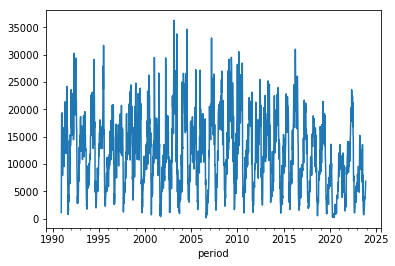

In [45]:
sorted_data['inc'] = pd.to_numeric(sorted_data['inc'], errors='raise')
sorted_data['inc'].plot()

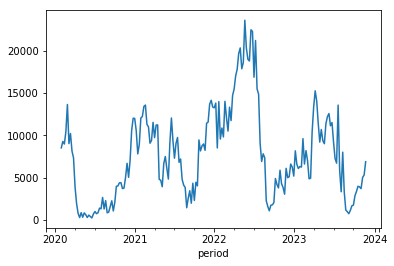

In [46]:
sorted_data['inc'][-200:].plot()

In [51]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [52]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    print(week1,week2)
    print(sorted_data['inc'])
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

1991-08-26/1991-09-01 1992-08-31/1992-09-06
period
1990-12-03/1990-12-09     1143
1990-12-10/1990-12-16    11079
1990-12-17/1990-12-23    19080
1990-12-24/1990-12-30    19375
1990-12-31/1991-01-06    15565
1991-01-07/1991-01-13    16277
1991-01-14/1991-01-20    15387
1991-01-21/1991-01-27     7913
1991-01-28/1991-02-03    10442
1991-02-04/1991-02-10    10877
1991-02-11/1991-02-17    12337
1991-02-18/1991-02-24    13289
1991-02-25/1991-03-03    13741
1991-03-04/1991-03-10    16643
1991-03-11/1991-03-17    15574
1991-03-18/1991-03-24    10864
1991-03-25/1991-03-31     9567
1991-04-01/1991-04-07    12265
1991-04-08/1991-04-14    13975
1991-04-15/1991-04-21    14857
1991-04-22/1991-04-28    13462
1991-04-29/1991-05-05    21385
1991-05-06/1991-05-12    16739
1991-05-13/1991-05-19    19053
1991-05-20/1991-05-26    14903
1991-05-27/1991-06-02    15452
1991-06-03/1991-06-09    11947
1991-06-10/1991-06-16    16171
1991-06-17/1991-06-23    16169
1991-06-24/1991-06-30    17608
                   

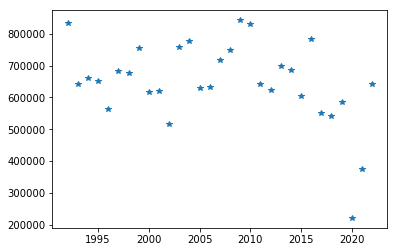

In [53]:
yearly_incidence.plot(style='*')

In [54]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64